# Linear Regression for predicting Housing Prices
A linear model makes a prediction by simply computing a *weighted sum* of the input *features*, plus a constant called the *bias term* (also called the intercept term) as shown in the following equation,
## $$ŷ = θ_0 + θ_1x_1 + θ_2x_2 + ··· + θ_nx_n$$
where, 
- $ŷ$ is the predicted value.
- $n$ is the number of features.
- $x_i$ is the ith feature value.
- $θ_j$ is the $j^{th}$ model parameter (including the bias term $θ_0$ and the feature weights $θ_1$, $θ_2$, ⋯, $θ_n$).
The equation be written much more concisely using a vectorized form,
## $$ŷ = h_θ(X) = θ^T · X$$
- $θ$ is the model’s parameter vector, containing the bias term $θ_0$ and the feature weights $θ_1$ to $θ_n$.
- $θ^T$ is the transpose of $θ$ (a row vector instead of a column vector).
- $X$ is the instance’s feature vector, containing $X_0$ to $X_n$, with $X_0$ always equal to 1.
- $θ^T · X$ is the dot product of $θ^T$ and $X$.
- $h_θ$ is the hypothesis function, using the model parameters θ.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
housing = pd.read_csv('../datasets/USA_Housing.csv')

## Data Exploration

In [37]:
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [38]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 253.9+ KB


In [39]:
housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


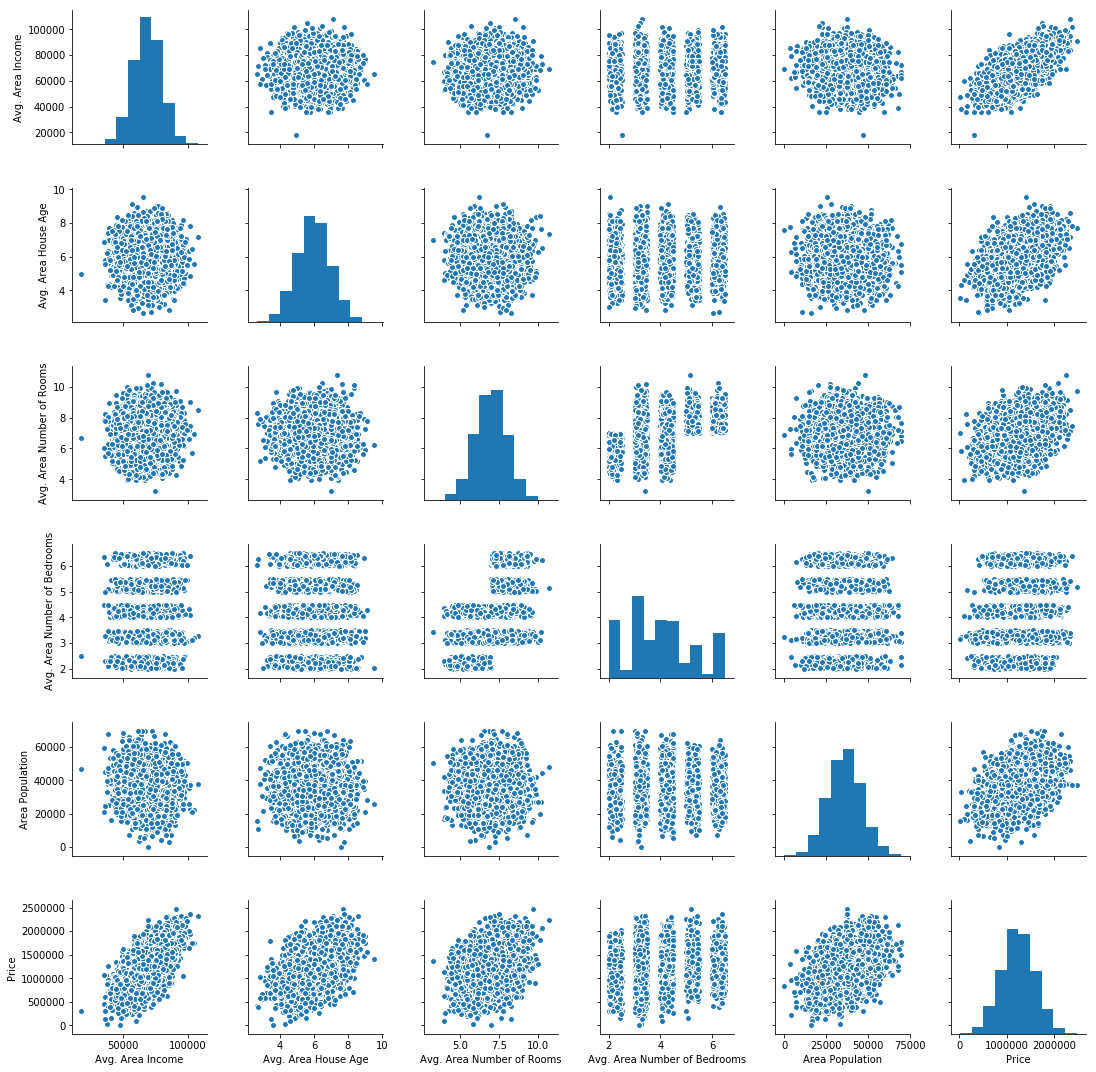

In [40]:
sns.pairplot(housing)
plt.savefig('../images/1. housing_pairplot.png', dpi=200)

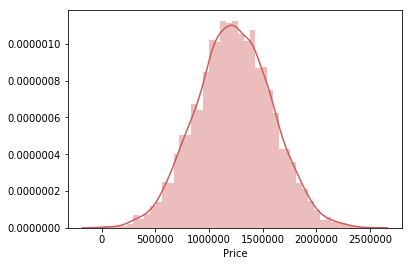

In [41]:
sns.distplot(housing['Price'],color='indianred')
plt.savefig('../images/1. housing_diskplot.png', dpi=200)

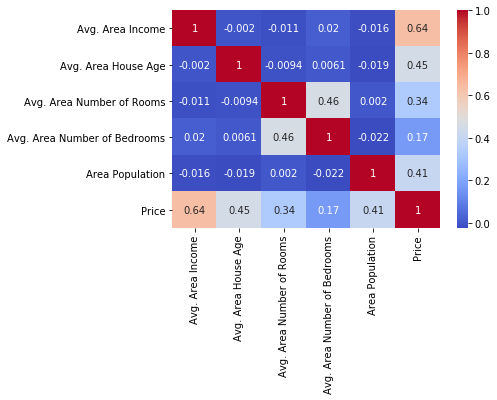

In [42]:
sns.heatmap(housing.corr(),cmap='coolwarm',annot=True)
plt.savefig('../images/1. housing_heatmapplot.png', dpi=200)

In [43]:
housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### We can also work with the Boston Dataset
```python
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
```

## Building the Model

### Creating features and Labels

In [44]:
X=housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=housing['Price']

### Splitting the dataset
While experimenting with any learning algorithm, it is important not to test the prediction of an estimator on the data used to fit the estimator as this would not be evaluating the performance of the estimator on new data. This is why datasets are often split into train and test data.
#### A random permutation, to split the data randomly
```python
np.random.seed(42)
indices = np.random.permutation(len(X))
X_train = X[indices[:-20]]
y_train = y[indices[:-20]]
X_test = X[indices[-20:]]
y_test = y[indices[-20:]]
```
#### But we will use the `train_test_split` function from `sklearn.model_selection`

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

#### Importing the model

In [47]:
from sklearn.linear_model import LinearRegression

#### Create and Fit a Linear Regression Model

In [48]:
lm = LinearRegression() # creating a linear regression object
lm.fit(X_train,y_train) # using the fit method to train the model to the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predictions

In [49]:
y_pred= lm.predict(X_test)

In [50]:
y_pred

array([ 1260960.70567626,   827588.75560352,  1742421.24254328, ...,
         372191.40626952,  1365217.15140895,  1914519.54178824])

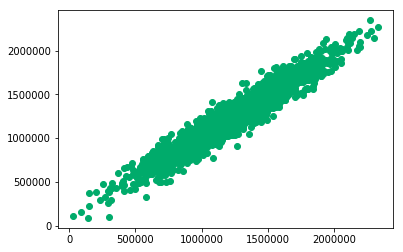

In [51]:
plt.scatter(y_test,y_pred,color='#00ab6b')

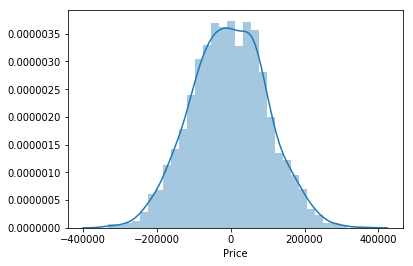

In [52]:
sns.distplot((y_test-y_pred))

## Evaluation
#### Evaluate the model by checking out its coefficient and how we can interpret them

In [53]:
print(lm.intercept_)

-2640159.79685


In [54]:
print(lm.coef_)

[  2.15282755e+01   1.64883282e+05   1.22368678e+05   2.23380186e+03
   1.51504200e+01]


In [55]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

___(add math here)___
If we hold all other features fixed, a one unit increase in a particular feature (such as 'Avg. Area Income') is associated with an increase of the corresponding coeff value in price.

In [56]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [57]:
from sklearn import metrics

In [58]:
metrics.mean_absolute_error(y_test,y_pred)

82288.222519149538

In [59]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

102278.82922291153